Лабораторная работа №4

In [ ]:
#!pip install --upgrade tensorflow
#!pip install  --upgrade tensorflow-gpu
#!pip install neupy
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import numpy as np
from neupy.algorithms import PNN, GRNN
from sklearn.svm import SVC

Подготовка данных

In [ ]:
#### training set
p, p1, p2 = 0.3,0.5,1.
alfa,alfa1,alfa2 = 0,0,0
x0,x01,x02 = 0,-0.5,-0.8
y0,y01,y02 = 0,0,0

t = np.arange(-np.pi, np.pi, 0.025)

x = (t**2/(2*p))*np.cos(alfa)-t*np.sin(alfa)+x0
y = (t**2/(2*p))*np.sin(alfa)+t*np.cos(alfa)+y0

x1 = (t**2/(2*p1))*np.cos(alfa1)-t*np.sin(alfa1)+x01
y1 = (t**2/(2*p1))*np.sin(alfa1)+t*np.cos(alfa1)+y01

x2 = (t**2/(2*p2))*np.cos(alfa2)-t*np.sin(alfa2)+x02
y2 = (t**2/(2*p2))*np.sin(alfa2)+t*np.cos(alfa2)+y02

X, X1, X2 = np.column_stack((x, y)), np.column_stack((x1, y1)), np.column_stack((x2, y2))
## 1 class
X = X[np.random.choice(X.shape[0], 60)]
Y = np.zeros(X.shape[0])
## 2 class
X = np.append(X, X1[np.random.choice(X1.shape[0], 100)], axis=0)
Y = np.append(Y, np.ones(100))
## 3 class
X = np.append(X, X2[np.random.choice(X2.shape[0], 120)], axis=0)
Y = np.append(Y, np.full(120, 2))
Y_norm = Y.copy()
#Y = np_utils.to_categorical(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)
print('data example: {} ----> {}'.format(X_train[0], np_utils.to_categorical(y_train[0])))

data example: [2.53699676 2.58340735] ----> [0. 0. 1.]


Изображение множеств

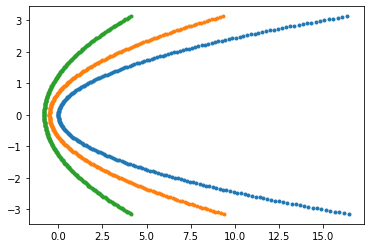

In [ ]:
plt.plot(x, y, '.')
plt.plot(x1, y1, '.')
plt.plot(x2, y2, '.')
plt.show()

Обучающая и тестовая выборки

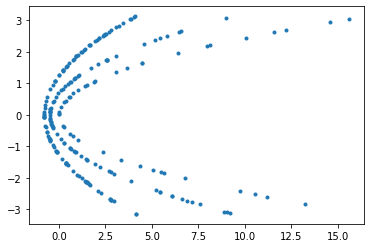

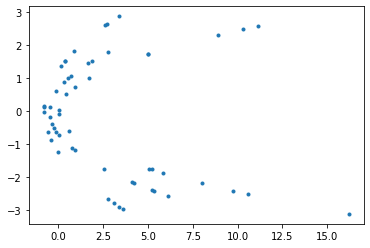

In [ ]:
plt.plot(X_train[:,0], X_train[:,1], '.')
plt.show()
plt.plot(X_test[:,0], X_test[:,1], '.')
plt.show()

задание 1

вероятносная сеть

In [ ]:
pnn = PNN(std=0.3, batch_size = 30, verbose=True)


Main information

[ALGORITHM] PNN

[OPTION] batch_size = 30
[OPTION] std = 0.3
[OPTION] verbose = True



обучение

In [ ]:
pnn.train(X_train, y_train)
pred = pnn.predict(X_train)
acc = metrics.accuracy_score(y_train, pred)
print('\ntrain accuracy: {}'.format(acc))

Time: 0:00:00 |N/A%|                                           | ETA:  --:--:--


train accuracy: 1.0


результаты на тестовой выборке

In [ ]:
pred = pnn.predict(X_test)
print('\ntest accuracy: {}'.format(metrics.accuracy_score(y_test, pred)))

Time: 0:00:00 |N/A%|                                           | ETA:  --:--:--


test accuracy: 0.9821428571428571


кодирование принадлежности к классам различными цветами

In [ ]:
h = 0.25
colors = []
d1 = np.array([])
d2 = np.array([])
I = np.linspace(-1,10,num=100)
J = np.linspace(-3.5,3.5,num=100)
for i in I:
    for j in J:
      d1 = np.append(d1,i)
      d2 = np.append(d2,j)
      pr = pnn.predict(np.array([i,j], ndmin=2))
      if pr == 0:
        colors.append('b')
      elif pr == 1:
        colors.append('r')
      else:
        colors.append('g')

d = np.column_stack((d1, d2))

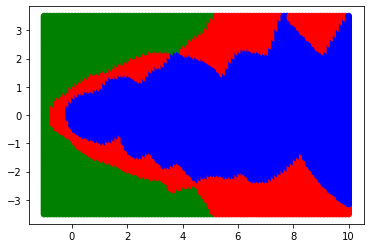

In [ ]:
plt.scatter(d[:,0], d[:,1], c=colors)
plt.show()

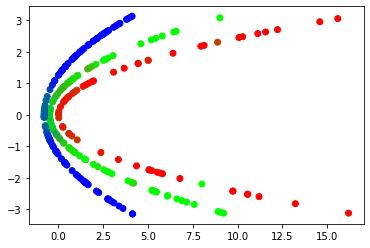

In [ ]:
colors = pnn.predict_proba(X)
plt.scatter(X[:,0], X[:,1], c=colors)
plt.show()

## задание 2

### сеть с радиальными базисными элементами

In [ ]:
model = SVC(C=1, kernel='rbf', gamma=0.3, probability=True)
model.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

результаты обучения

In [ ]:
sc = model.score(X_train, y_train)
print('train accuracy: {}'.format(sc))

train accuracy: 0.9241071428571429


точность на тестовой выборке

In [ ]:
sc = model.score(X_test, y_test)
print('test accuracy: {}'.format(sc))

test accuracy: 0.9107142857142857


кодирование принадлежности к классам различными цветами

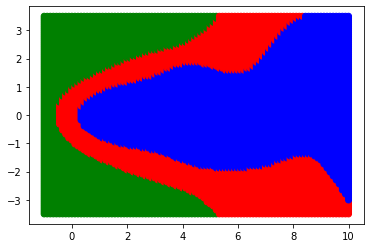

In [ ]:
h = 0.25
colors = []
d1 = np.array([])
d2 = np.array([])
I = np.linspace(-1,10,num=100)
J = np.linspace(-3.5,3.5,num=100)
for i in I:
    for j in J:
      d1 = np.append(d1,i)
      d2 = np.append(d2,j)
      pr = model.predict(np.array([i,j], ndmin=2))
      if pr == 0:
        colors.append('b')
      elif pr == 1:
        colors.append('r')
      else:
        colors.append('g')

d = np.column_stack((d1, d2))
plt.scatter(d[:,0], d[:,1], c=colors)
plt.show()

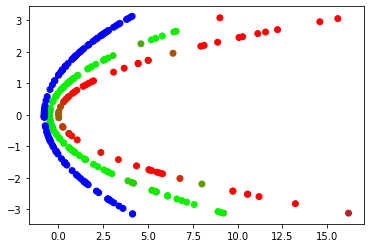

In [ ]:
colors = model.predict_proba(X)
plt.scatter(X[:,0], X[:,1], c=colors)
plt.show()

## задание 3

### обощенно-регрессионная нейронная сеть

график функции

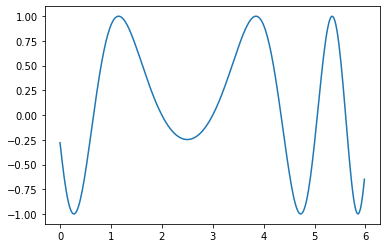

In [ ]:
h = 0.02
t = np.arange(0, 6., h)
x = np.sin(t*t-5*t+6)
plt.plot(t, x, '-')
plt.show()

подготовка обучающей выборки

In [ ]:
ts = (int)(0.1*len(x))
X_test = t[-ts:]
y_test = x[-ts:]
X_train = t[:-ts]
y_train = x[:-ts]

обобщенно-регрессионная модель

In [ ]:
model = GRNN(std=0.2, verbose=True)


Main information

[ALGORITHM] GRNN

[OPTION] std = 0.2
[OPTION] verbose = True



обучение модели

In [ ]:
model.train(X_train, y_train)
pred = model.predict(X_train)
mse = np.mean((pred - y_train) ** 2)
print('train mse: {}'.format(mse))

train mse: 0.682080118432669


результаты на тестовой выборке

In [ ]:
pred = model.predict(X_test)
mse = np.mean((pred - y_test) ** 2)
print('test mse: {}'.format(mse))

test mse: 1.8863060949877273


значения предсказанные сетью

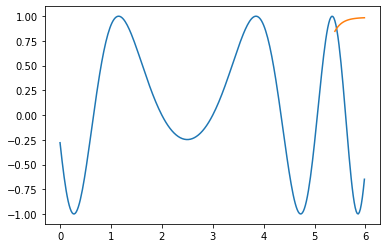

In [ ]:
plt.plot(t, x, '-')
plt.plot(X_test, pred, '-')
plt.show()

аппроксимация

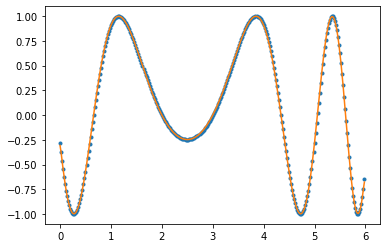

In [ ]:
model = GRNN(std=h, verbose=False)
model.train(t, x)
preds = model.predict(t)
plt.plot(t,x,'.')
plt.plot(t,preds,'-')
plt.show()

In [ ]:
mse = np.mean((preds - x) ** 2)
print('apro mse: {}'.format(mse))

apro mse: 0.797576645435795
